# Assignment-Time Series Analysis
Due on Oct. 24th

Please retrieve daily closing stock price of AT&T using `yahoo finance`. Then, do the following tasks:
    
Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

Question 2. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

Question 3. If the series is not stationary, please make it stationary.(20 pts)

Question 4. Model the series using moving average and autoregressive model with an optimum lag.(20 pts)

Questions 5. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.(20 pts)

Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

In [1]:
# codes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock = 'T'
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,8,1)
AT_close = yf.download(stock, start = start, end=end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
AT_close.head(10)

Date
2021-01-04    22.235649
2021-01-05    22.099697
2021-01-06    22.530210
2021-01-07    22.590633
2021-01-08    21.918428
2021-01-11    21.805136
2021-01-12    21.714502
2021-01-13    21.608761
2021-01-14    22.122356
2021-01-15    22.031721
Name: Close, dtype: float64

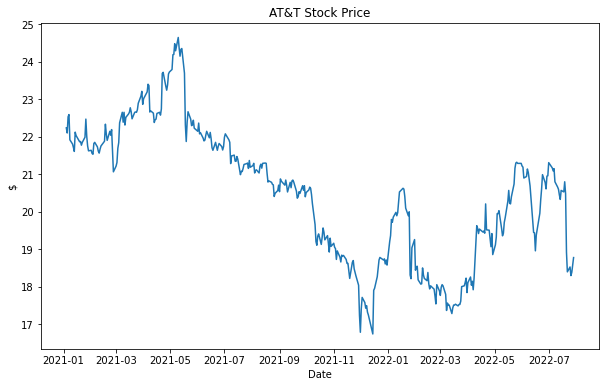

In [4]:
plt.plot(AT_close)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AT&T Stock Price')
plt.show()

If we see the grapgh we can see that there is positive trend from january 2021 to june 2021 and there is downward trend from june 2021 to jan 2022 and after that there is a positve trend till the end. If we see the starting point and ending point we can see that there is negative slope and we can say that there is a trend in stock prices of AT & T in time.

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

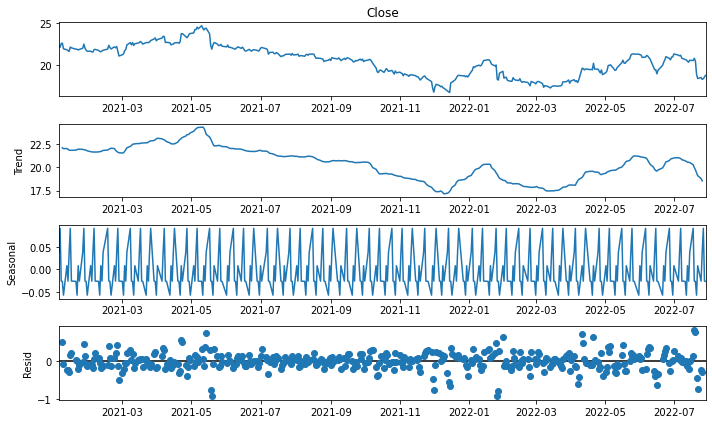

In [6]:
decomposition = seasonal_decompose(AT_close, model='additive', period=7)
decomposition.plot()
plt.show()

In the first graph, we see the behavior of the raw data. Overall, it has a downward trend despite a increase at the end of the  of 2021

The second plot exhibits the trend of the data. Trend shows the overall movement of a time series. We can say that there exist a trend if there is a long-term increase or decrease in the data. so we can see that there is longterm decrease in the data.

Seasonality is the third plot which shows periodical ups and downs in the data. If there is a seasonality in the data, it should also be removed. from above graph we cannot come to any conclusion

The last graph show the residuals. This is obtained after removing the trend and seasonal components from the time series. If we end up with a rather stable residual, it means that our data is stationary structure and ready to move on the modeling part.We can see the highly volatile distribution of the residual and this  indicates that the data is not stationary.

In [7]:
AT_close.isnull().sum()

0

As we can see there is no null values we can proceed with the Time-series Analysis

Question 2. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

## Augmented Dickey Fuller (ADF)

In [8]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(AT_close)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -1.7157887570642274 and p-value is 0.42299654261868924


As we can see that p-value is greater than 0.05 and we can say that the time series is not stationary and we have to find a way to make it stationary

## Autocorrelation Function (ACF)

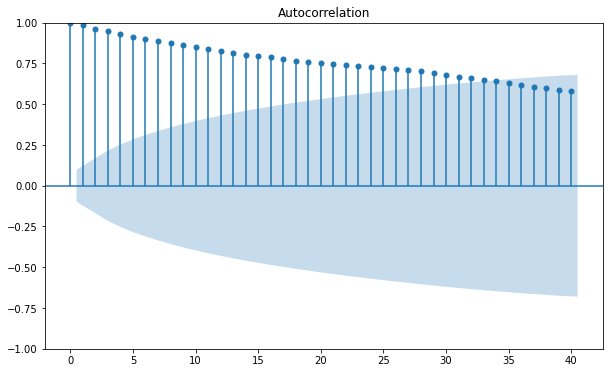

In [9]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(AT_close, lags=40);

The `acf` plot indicates that acf is slowly decaying, which is an indicator of non-stationarity. Besides, the blue shaded area represents the confidence interval. If the bar is in this confidence interval, it indicates that there is no significant correlation between this lag and the current one and this information is used for identifying the optimal lag. As this data is non-stationary, it makes no sense to apply this information here.

## Partial Autocorrelation Function (PACF)

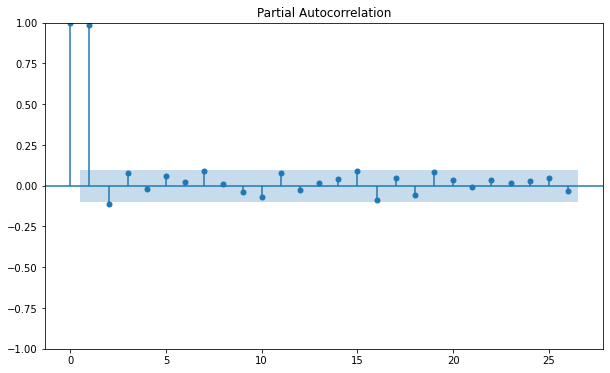

In [10]:
sm.graphics.tsa.plot_pacf(AT_close);

We can also see from PACF there is spikes in first two lags which shows that the data is not stationary

Question 3. If the series is not stationary, please make it stationary.(20 pts)

In [11]:
AT_diff = AT_close.diff().dropna()
AT_diff

Date
2021-01-05   -0.135952
2021-01-06    0.430513
2021-01-07    0.060423
2021-01-08   -0.672205
2021-01-11   -0.113293
                ...   
2022-07-25    0.130001
2022-07-26   -0.230001
2022-07-27    0.090000
2022-07-28    0.190001
2022-07-29    0.200001
Name: Close, Length: 395, dtype: float64

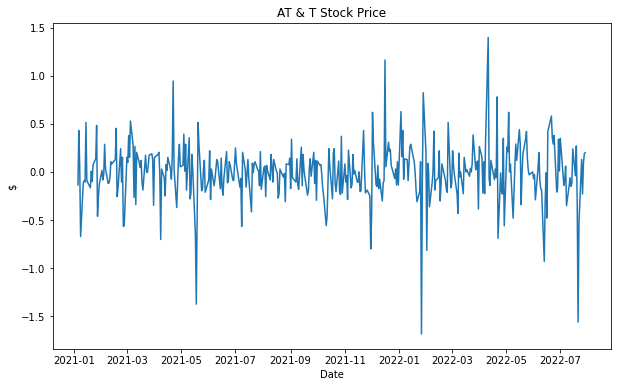

In [12]:
plt.plot(AT_diff)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AT & T Stock Price')
plt.show()

## Augmented Dickey Fuller (ADF)

In [13]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(AT_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -14.953108483675337 and p-value is 1.2717011397742989e-27


we can see that p-value is almost equal to zero which is less than 0.05. so we can say that the time-series is stationary

## Autocorrelation Function (ACF)

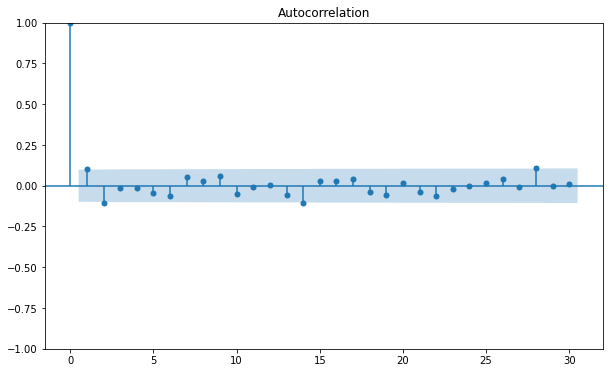

In [14]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(AT_diff, lags=30);

## Partial Autocorrelation Function (PACF)

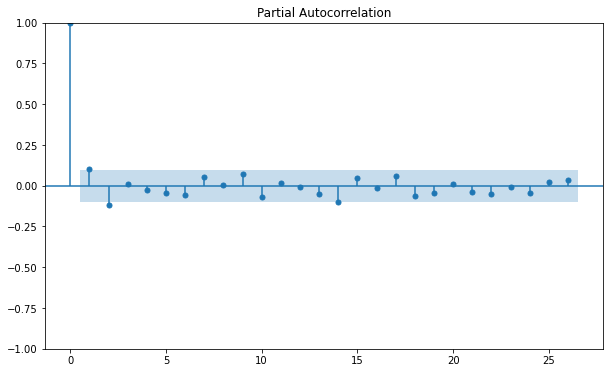

In [15]:
sm.graphics.tsa.plot_pacf(AT_diff);

Question 4. Model the series using moving average and autoregressive model with an optimum lag.(20 pts)
Questions 5. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.(20 pts)

## Moving average

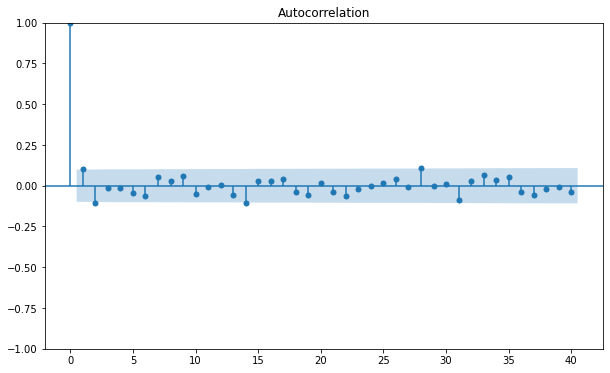

In [16]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(AT_diff, lags=40);

The above-given acf plot exhibits that there is a spike at the  14th  lag. Moreover, we have more peaks at larger lags. So, it is up to you to choose the proper lag as it depends your approach.I want to choose 14th lag.

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
train_len = int(len(AT_diff) * 0.8)
diff_train = AT_diff[:train_len]
diff_test = AT_diff[train_len:]

In [19]:
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [20]:
ma_model = ARIMA(diff_train, order=(0, 0, 14))
ma_result = ma_model.fit()

C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
ma_pred = ma_result.predict(start, end)
ma_pred.index = diff_test.index

C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


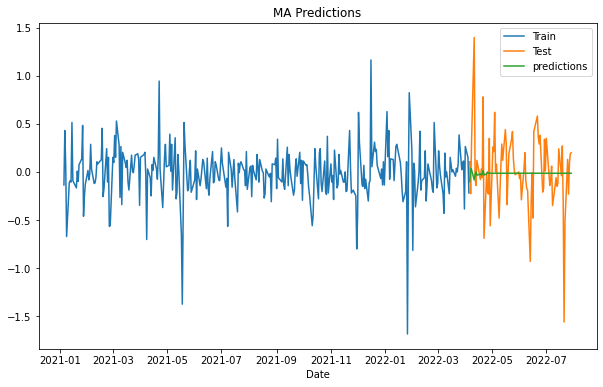

In [22]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ma_pred.index , ma_pred, label='predictions')
plt.title('MA Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mae_ma = mean_absolute_error(diff_test, ma_pred)
mse_ma = mean_squared_error(diff_test, ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test, ma_pred))

In [25]:
ma_perf = {'mae_ma': mae_ma,
             'mse_ma':mse_ma,
             'rmse_ma':rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,0.264922,0.145428,0.38135


In [26]:
ma_model = ARIMA(AT_diff, order=(0, 0, 14))
ma_result = ma_model.fit()

C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
forecast_index = pd.date_range(diff_test.index[-1], periods=10)


In [28]:
ma_forecast = ma_result.forecast(steps=10)
ma_forecast.index = forecast_index

C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


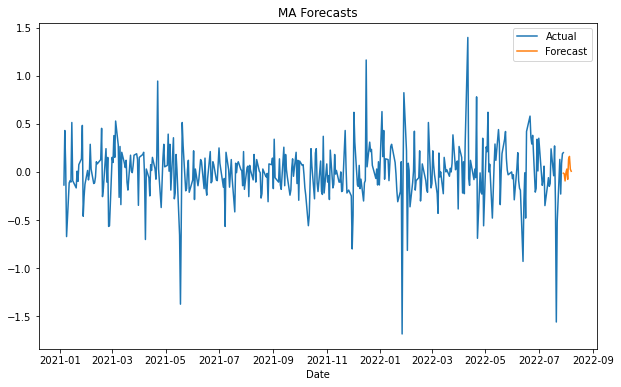

In [29]:
plt.plot(AT_diff.index, AT_diff, label='Actual')
plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
plt.legend()
plt.title('MA Forecasts')
plt.xlabel('Date')
plt.show()

## Autoregressive Model

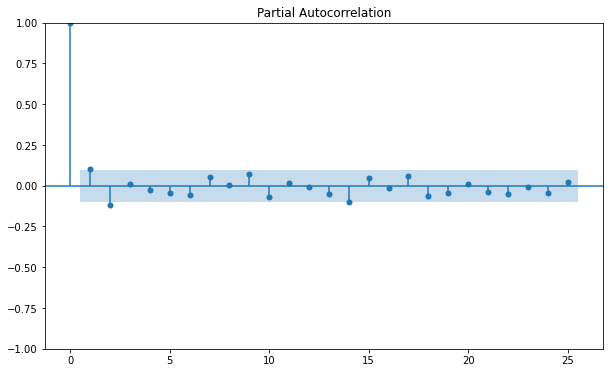

In [30]:
sm.graphics.tsa.plot_pacf(AT_diff, lags=25);

In [31]:
ar_model = ARIMA(diff_train, order=(14, 0, 0))
ar_result = ar_model.fit()

C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
ar_pred = ar_result.predict(start, end)
ar_pred.index = diff_test.index

C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


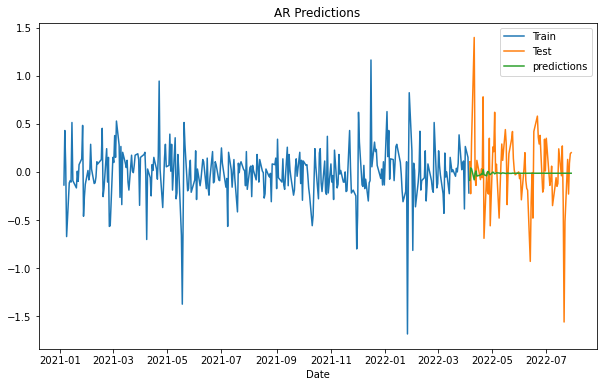

In [33]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ar_pred.index , ar_pred, label='predictions')
plt.title('AR Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [34]:
mae_ar = mean_absolute_error(diff_test, ar_pred)
mse_ar = mean_squared_error(diff_test, ar_pred)
rmse_ar = np.sqrt(mean_squared_error(diff_test, ar_pred))

In [35]:
ar_perf = {'mae_ar': mae_ar,
             'mse_ar':mse_ar,
             'rmse_ar':rmse_ar}
ar_perf = pd.DataFrame([ar_perf])
ar_perf

,mae_ar,mse_ar,rmse_ar
0,0.264978,0.145216,0.381072


In [36]:
ar_model = ARIMA(AT_diff, order=(14, 0, 0))
ar_result = ar_model.fit()

C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
ar_forecast = ar_result.forecast(steps=10)
ar_forecast.index = forecast_index

C:\Users\sreek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


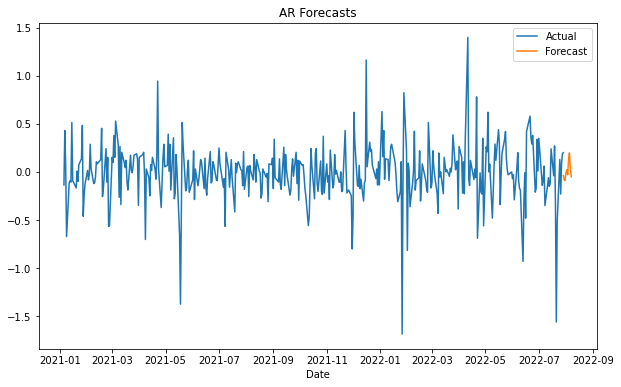

In [38]:
plt.plot(AT_diff.index, AT_diff, label='Actual')
plt.plot(ar_forecast.index, ar_forecast, label='Forecast')
plt.legend()
plt.title('AR Forecasts')
plt.xlabel('Date')
plt.show()

We can see from above that both models Moving Average and Auto Regressive model are performing almost in same way and RMSE,MAE,MSE are almost equal for both of them.